# Market Data Analysis

## Project Overview

###### A data analysis on stocks to understand and visualizes changes and correlations

### Part 1: Analysis of Apple Stocks over 5-year period from the start of 2018

##### Downloading Data from Yahoo Finance Module, saving data and creating csv file

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ticker = "AAPL"
start_date = "2018-01-01"
end_date = "2023-01-01"
data = yf.download(ticker, start=start_date, end=end_date)
data.to_csv("../data/AAPL.csv",)
df = pd.read_csv("../data/AAPL.csv", header=1)

C:\Users\prana\AppData\Local\Temp\ipykernel_61828\3029667728.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


##### Cleaning Data

In [5]:
df.rename(columns={
    'Ticker': 'Date',
    'AAPL': 'Close',
    'AAPL.1': 'High',
    'AAPL.2': 'Low',
    'AAPL.3': 'Open',
    'AAPL.4': 'Volume'
}, inplace=True)
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


print(df.head())
print(df.describe())

                Close       High        Low       Open       Volume
Date                                                               
2018-01-02  40.381001  40.390379  39.677744  39.888723  102223600.0
2018-01-03  40.373962  40.917816  40.310672  40.444289  118071600.0
2018-01-04  40.561501  40.664645  40.338803  40.446634   89738400.0
2018-01-05  41.023296  41.110030  40.566180  40.657604   94640000.0
2018-01-08  40.870926  41.166292  40.772467  40.870926   82271200.0
             Close         High          Low         Open        Volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean     95.469207    96.565118    94.289066    95.406639  1.168806e+08
std      46.026484    46.606830    45.409783    46.018529  5.504461e+07
min      33.832436    34.672357    33.787227    34.258343  3.519590e+07
25%      48.819757    49.207544    48.389951    48.827303  8.014245e+07
50%      88.972145    90.270806    88.270631    88.629884  1.023002e+08
75%     140.189972  

##### Getting Daily Return and Rolling Averages

In [6]:
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].head()

Date
2018-01-02         NaN
2018-01-03   -0.000174
2018-01-04    0.004645
2018-01-05    0.011385
2018-01-08   -0.003714
Name: Daily Return, dtype: float64

In [7]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

In [8]:
df[['Close','MA20','MA50']].head(25)

Close       MA20  MA50
Date                                  
2018-01-02  40.381001        NaN   NaN
2018-01-03  40.373962        NaN   NaN
2018-01-04  40.561501        NaN   NaN
2018-01-05  41.023296        NaN   NaN
2018-01-08  40.870926        NaN   NaN
2018-01-09  40.866257        NaN   NaN
2018-01-10  40.856861        NaN   NaN
2018-01-11  41.088936        NaN   NaN
2018-01-12  41.513245        NaN   NaN
2018-01-16  41.302250        NaN   NaN
2018-01-17  41.984425        NaN   NaN
2018-01-18  42.021923        NaN   NaN
2018-01-19  41.834389        NaN   NaN
2018-01-22  41.492146        NaN   NaN
2018-01-23  41.501518        NaN   NaN
2018-01-24  40.840466        NaN   NaN
2018-01-25  40.111416        NaN   NaN
2018-01-26  40.205185        NaN   NaN
2018-01-29  39.372997        NaN   NaN
2018-01-30  39.140923  40.867181   NaN
2018-01-31  39.248753  40.810569   NaN
2018-02-01  39.330803  40.758411   NaN
2018-02-02  37.624237  40.611547   NaN
2018-02-05  36.684212  40.394593   NaN
2018-02-06  38.217308  40.261912   NaN

##### Volatility of 20-Day Rolling Averages

In [9]:
df['Volatility20'] = df['Daily Return'].rolling(window=20).std()

###### Plotting Close Price against 20-Day and 50-Day Rolling Averages, and Distribution of Daily Returns throughout the Period

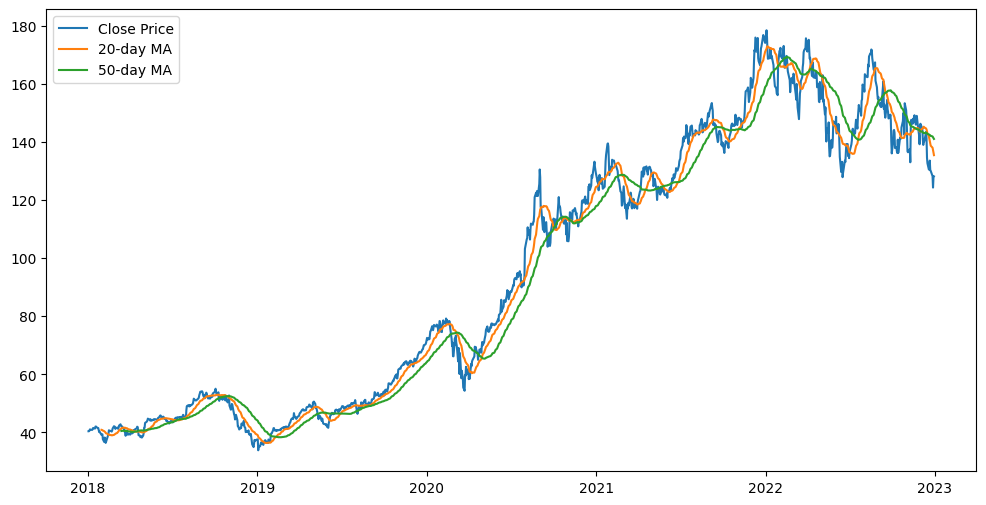

In [10]:
plt.figure(figsize=(12,6)) 
plt.plot(df['Close'], label='Close Price') 
plt.plot(df['MA20'], label='20-day MA') 
plt.plot(df['MA50'], label='50-day MA') 
plt.legend() 
plt.savefig("../plots/close_price_ma.png")
plt.show()

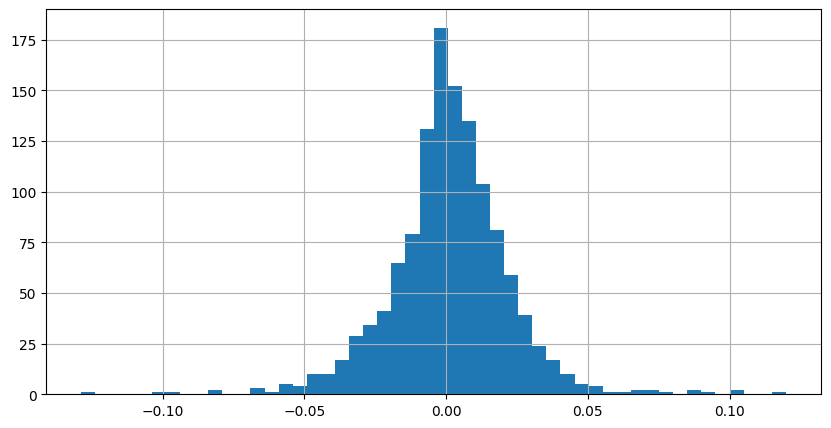

In [11]:
df['Daily Return'].hist(bins=50, figsize=(10,5)) 
plt.savefig("../plots/dailyreturns_apple_histogram")
plt.show()

##### Plotting 20-day Rolling Volatility with Highlight on COVID Crash, Visualizing clear effect of COVID on Volatility

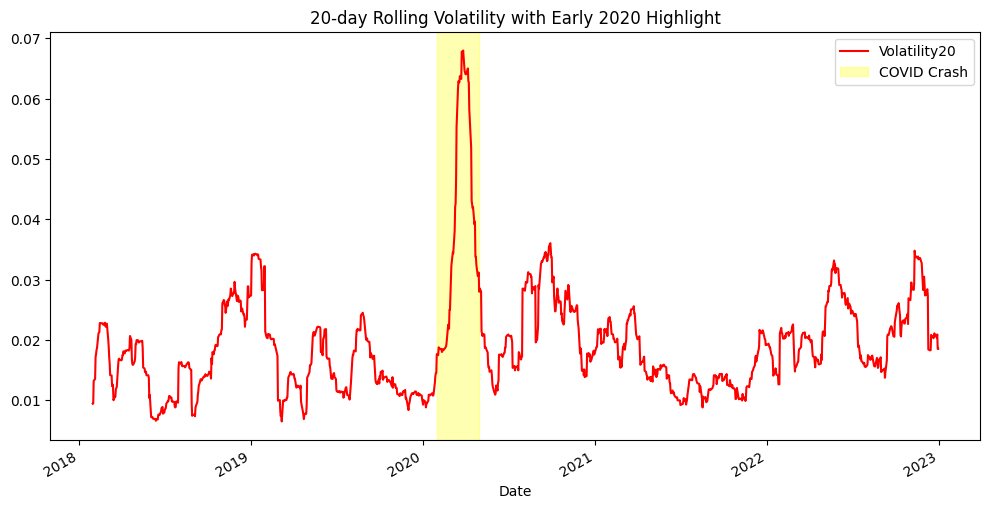

In [12]:
df['Volatility20'].plot(figsize=(12,6), title="20-day Rolling Volatility", color = 'red') 


plt.axvspan('2020-02-01', '2020-04-30', color='yellow', alpha=0.3, label='COVID Crash')

plt.title("20-day Rolling Volatility with Early 2020 Highlight")
plt.legend()
plt.savefig("../plots/rolling_volatility_early2020highlight")
plt.show()

### Part 2: Analysis of Correlations between different stocks - Apple, Microsoft and Tesla

##### Obtaining Data from Yahoo Finance from the start of 2020 up to date

In [13]:
tickers = ['AAPL', 'MSFT', 'TSLA']
data = yf.download(tickers, start='2020-01-01', end='2025-09-30')['Close']
data.head()

C:\Users\prana\AppData\Local\Temp\ipykernel_61828\1487086502.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-01-01', end='2025-09-30')['Close']
[*********************100%***********************]  3 of 3 completed


Ticker           AAPL        MSFT       TSLA
Date                                        
2020-01-02  72.538498  152.791168  28.684000
2020-01-03  71.833298  150.888580  29.534000
2020-01-06  72.405693  151.278641  30.102667
2020-01-07  72.065140  149.899307  31.270666
2020-01-08  73.224419  152.286972  32.809334

###### Getting 'returns' Dataframe from data

In [14]:
returns = data.pct_change()
returns.head()

Ticker          AAPL      MSFT      TSLA
Date                                    
2020-01-02       NaN       NaN       NaN
2020-01-03 -0.009722 -0.012452  0.029633
2020-01-06  0.007968  0.002585  0.019255
2020-01-07 -0.004703 -0.009118  0.038801
2020-01-08  0.016087  0.015928  0.049205

###### Obtaining overall correlation matrix of returns of stocks


In [15]:
correlation = returns.corr()
print(correlation)

Ticker      AAPL      MSFT      TSLA
Ticker                              
AAPL    1.000000  0.716931  0.494996
MSFT    0.716931  1.000000  0.451046
TSLA    0.494996  0.451046  1.000000


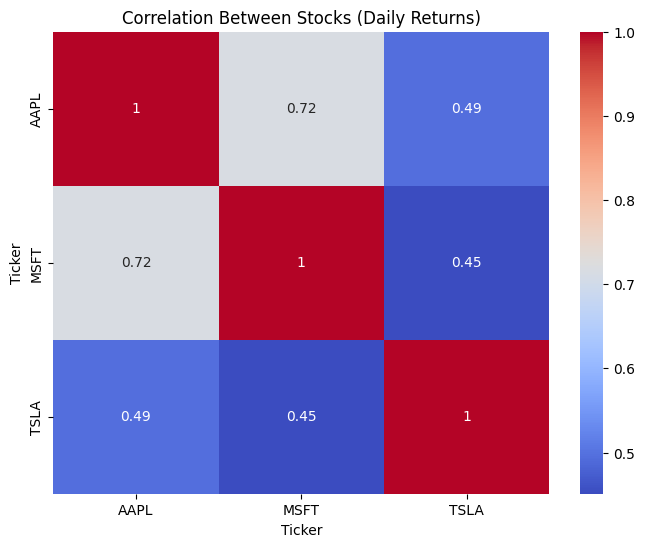

In [16]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Stocks (Daily Returns)")
plt.savefig("../plots/overall_dailyreturns_stockcorr.png")
plt.show()

###### Apple and Microsoft show higher correlations, Tesla, being in a slightly different industry understandably has lower correlations with the other two stocks

##### Correlations Matrices for Rolling Averages with different day range - 5, 20 and 50

In [17]:
ma_windows = [5, 20, 50]
for w in ma_windows:
    for ticker in tickers:
        data[f'{ticker}_MA{w}'] = data[ticker].rolling(window=w).mean()

In [18]:
ma5_returns = data[[f'{t}_MA20' for t in tickers]].pct_change()
print(ma5_returns.corr())

Ticker     AAPL_MA20  MSFT_MA20  TSLA_MA20
Ticker                                    
AAPL_MA20   1.000000   0.653765   0.618279
MSFT_MA20   0.653765   1.000000   0.562925
TSLA_MA20   0.618279   0.562925   1.000000


##### Plot of Correlations of Rolling averages between Apple and Microsoft - areas of high correlation show periods where perhaps there was events that affected both companies equally, whereas periods of low correlation could result from company-specific news

In [19]:
stock1 = 'AAPL'
stock2 = 'MSFT'

In [20]:
rolling_corr = returns[stock1].rolling(window=20).corr(returns[stock2])

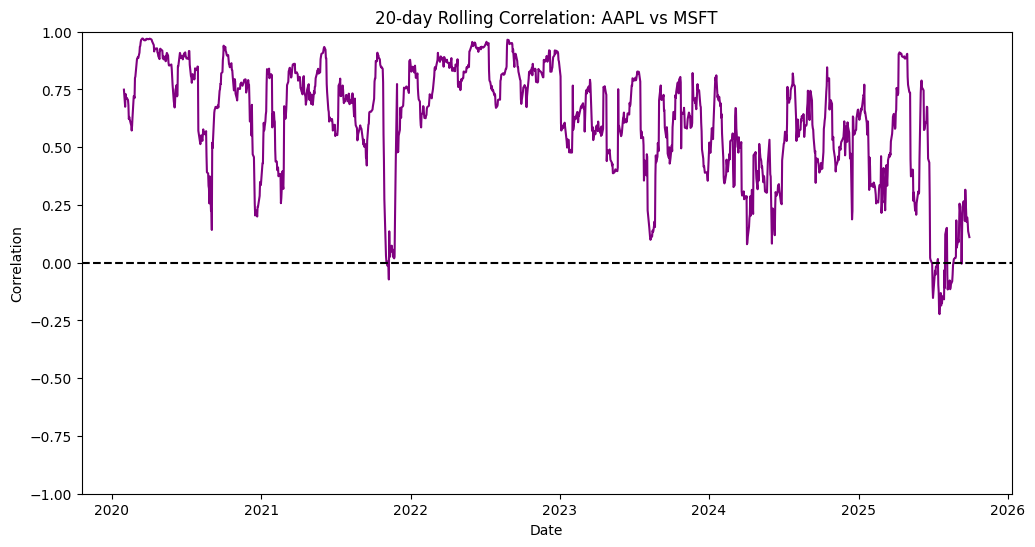

In [22]:
plt.figure(figsize=(12,6))
plt.plot(rolling_corr, color='purple')
plt.title(f"20-day Rolling Correlation: {stock1} vs {stock2}")
plt.ylabel("Correlation")
plt.xlabel("Date")
plt.ylim(-1,1)  # Keep the y-axis between -1 and 1
plt.axhline(0, color='black', linestyle='--')  # reference line at 0
plt.savefig("../plots/rollingcorr_aaplvsmsft_plot")
plt.show()

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tickers = ['AAPL', 'MSFT', 'TSLA']
data = yf.download(tickers, start='2020-01-01', end='2025-09-30')['Close']
returns = data.pct_change()

C:\Users\prana\AppData\Local\Temp\ipykernel_61828\2759317204.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-01-01', end='2025-09-30')['Close']
[*********************100%***********************]  3 of 3 completed


##### Creating function to create correlation heatmap of n-day rolling correlation between the three companies on any specific day

In [24]:
window = 60
rolling_corrs = returns.rolling(window=window).corr()
rolling_corrs.head()

Ticker             AAPL  MSFT  TSLA
Date       Ticker                  
2020-01-02 AAPL     NaN   NaN   NaN
           MSFT     NaN   NaN   NaN
           TSLA     NaN   NaN   NaN
2020-01-03 AAPL     NaN   NaN   NaN
           MSFT     NaN   NaN   NaN

In [26]:
def plot_corr_heatmap(date):
    corr_matrix = rolling_corrs.loc[date]
    plt.figure(figsize=(6,5))
    sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
    plt.title(f"{window}-Day Rolling Correlation on {date.date()}")
    plt.savefig("../plots/day-specific-rollingcorr.png")
    plt.show()

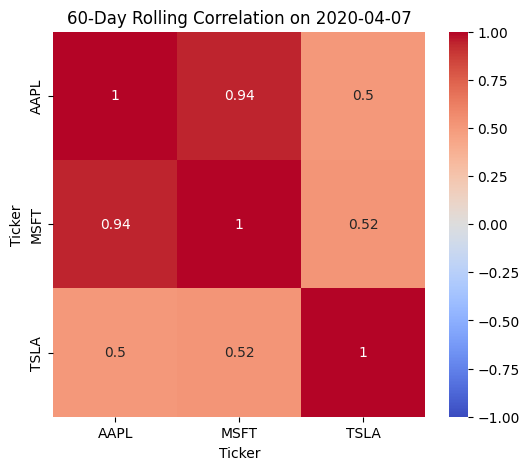

In [27]:
plot_corr_heatmap(rolling_corrs.index.get_level_values(0)[200])

##### Animation of n-Day Rolling Correlation between the stocks over the time period

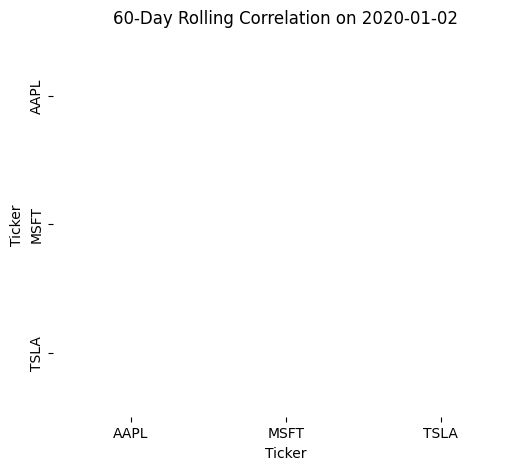

In [29]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(6,5))

def animate(i):
    ax.clear()
    date = rolling_corrs.index.get_level_values(0).unique()[i]
    corr_matrix = rolling_corrs.loc[date]
    sns.heatmap(corr_matrix, annot=False, vmin=-1, vmax=1, cmap='coolwarm', ax=ax, cbar=False)
    ax.set_title(f"{window}-Day Rolling Correlation on {date.date()}")

ani = animation.FuncAnimation(fig, animate, frames=200, interval=200)
HTML(ani.to_jshtml())

In [30]:
ani.save("rolling_corr.gif", writer="pillow")

##### Creating Graph of n-Day rolling correlations between stock pairs over the time period from the start of 2020 to date

In [31]:
window = 20

rolling_pair_corr = pd.DataFrame(index=returns.index)

tickers = returns.columns.tolist()
for i in range(len(tickers)):
    for j in range(i+1, len(tickers)):
        stock1 = tickers[i]
        stock2 = tickers[j]
        col_name = f"{stock1}-{stock2}"
        rolling_pair_corr[col_name] = returns[stock1].rolling(window).corr(returns[stock2])

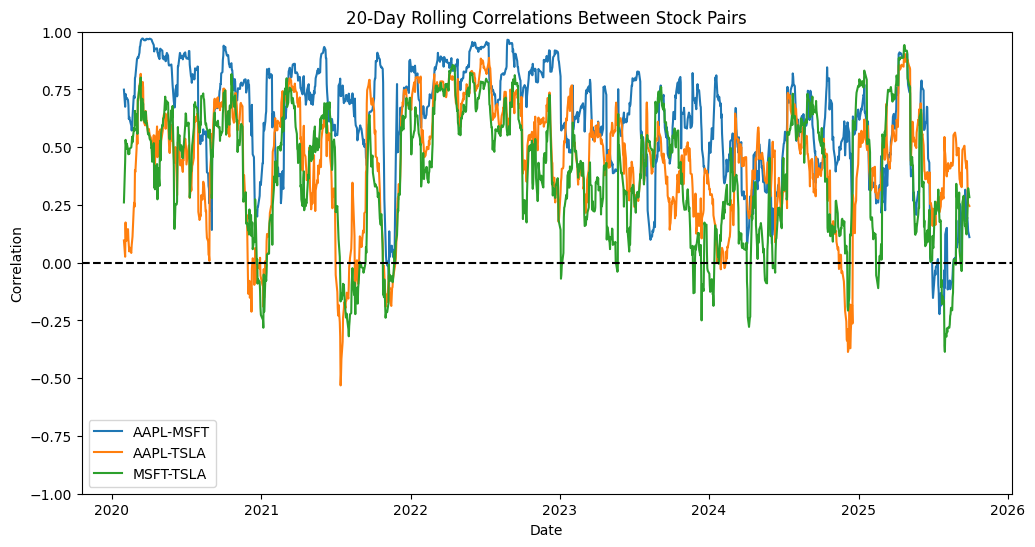

In [32]:
plt.figure(figsize=(12,6))
for col in rolling_pair_corr.columns:
    plt.plot(rolling_pair_corr.index, rolling_pair_corr[col], label=col)

plt.title(f"{window}-Day Rolling Correlations Between Stock Pairs")
plt.ylabel("Correlation")
plt.xlabel("Date")
plt.ylim(-1,1)
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.savefig("../plots/20day_rollingcorrs_betweenpairs.png")
plt.show()

## Conclusions

#### Part 1: Plotting the Close Price and 20 and 50 day rolling averages of the stock over time showed changes in the value of the stock, and also plotting these three together increased my understanding of the value of rolling averages, 20-day rolling averages give a smaller window that can be used to make conclusions and decisions on a short term scale or when the market is volatile perhaps, whereas 50-day rolling averages give a bigger picture. Plotting the Rolling Volatility allowed us to clearly see the volatility of the stock over time, and on this plot, we could clearly see the affects of periods of high uncertainty, such as the COVID pandemic and crash. Volatility is the standard deviation of the last few daily returns.

#### Part 2: Plotting the correlation matrix of the daily returns of different stocks (daily returns is percent change in value from previous closing price) showed clearly how similar the stock variation for different companies were. Apple and Microsoft both being tech companies had a higher correlation, whereas Tesla being in a different field had lower correlation with the other two companies when it came to daily returns. Plotting the 20-day rolling correlation between Apple and Microsoft Stocks showed the correlation of the stocks' daily returns during different periods of time, based on the daily returns of the last 20 days for each particular date. Overall, the correlation was almost always positive, showing high overall correlation between the companies, once again due to being both in the tech field, for example if an event occurred that affected some part of app development globally, both Apple and Microsoft would both be affected similarly. However, periods of low correlation could hint at times of company-specific news being the factor, where only one company is affected. Overall, on the n-day rolling correlation matrix creator for any specific date, we saw the general pattern of high correlation between Apple and Microsoft, but lower whan correlating with Tesla. The animation showed this over the period, allowing us to get an understanding of how the correlation between the stocks changed over the period. Finally, the line graph plot of the rolling correlations between stock pairs, with three lines, each representing a stock-pair, allows us to more qualitatively analyse. Overall, the Apple-Microsoft correlation was more steady, and also higher on average compared to those with Tesla, which were more variable. Near the end of 2021 however, all three pair correlations dropped equally to about 0, suggesting no real correlation between any of the stocks. One possible reason for this could have been due to the macro market shock - at the end of 2021, markets were reacting to rising inflation, with the U.S. Federal Reserve signalling interest rate hikes, and a shift from pandemic-era stimulus, and such macroeconomic changes can cause stocks that usually move together to temporarily diverge, thus lowering correlations.